<a href="https://colab.research.google.com/github/AlmaLiezenga/fruitpunch_coral_classification/blob/estine-dev/Coral_classification_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Run Yolov5 single-label classifier on cleaned dataset.**

Can choose from below pre-trained models (screenshot from Yolov5 repo)

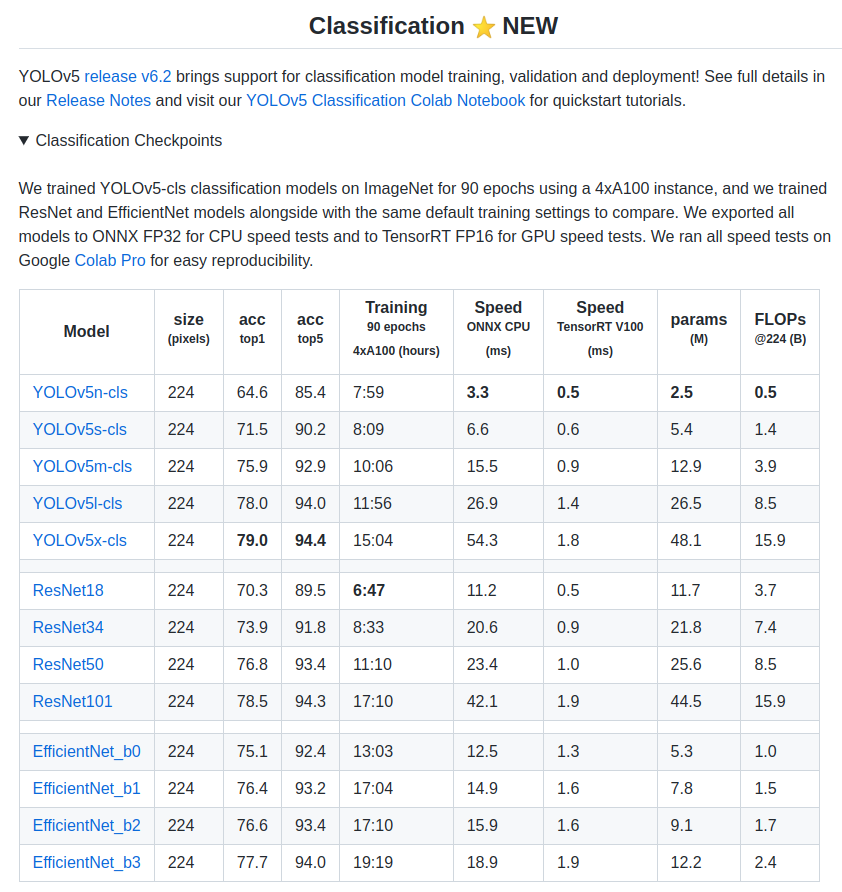

In [ ]:
#Requirements for yolov5
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-31-g443ef7f Python-3.8.16 torch-1.13.0+cu116 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/107.7 GB disk)


In [ ]:
#Prep cleaned dataset
!git clone https://github.com/AlmaLiezenga/fruitpunch_coral_classification

Cloning into 'fruitpunch_coral_classification'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 69 (delta 28), reused 31 (delta 6), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [ ]:
%cd /content/fruitpunch_coral_classification

/content/fruitpunch_coral_classification


In [ ]:
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 4.2 MB/s 
     |████████████████████████████████| 439 kB 43.9 MB/s 
     |████████████████████████████████| 17.1 MB 66.3 MB/s 
     |████████████████████████████████| 12.2 MB 44.8 MB/s 
     |████████████████████████████████| 3.2 MB 36.2 MB/s 
     |████████████████████████████████| 423 kB 51.1 MB/s 
     |████████████████████████████████| 9.8 MB 69.2 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 109 kB 66.1 MB/s 
     |████████████████████████████████| 237 kB 61.5 MB/s 
     |████████████████████████████████| 280 kB 63.5 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 153 kB 64.7 MB/s 
     |████████████████████████████████| 44 kB 3.1 MB/s 
     |████████████████████████████████| 44 kB 2.4 MB/s 
     |████████████████████████████████

In [ ]:
%cd fruitpunch_coral_classification


/content/fruitpunch_coral_classification


In [ ]:
!dvc pull

Querying remote cache:   0% 0/1 [00:00<?, ?files/s{'info': ''}]Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=710796635688-iivsgbgsb6uv1fap6635dhvuei09o66c.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8090%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.appdata&access_type=offline&response_type=code&approval_prompt=force

^C


In [ ]:
#Potentially different size models and add reporting
%cd ../yolov5
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')


#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'TensorBoard' #@param ['TensorBoard', 'Comet', 'ClearML']

if logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  import clearml; clearml.browser_login()

In [ ]:
#Train on custom dataset
!python classify/train.py --model yolov5s-cls.pt --data $DATASET_NAME --epochs 5 --img 128 --pretrained weights/yolov5s-cls.pt

In [ ]:
#Validate model
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data ../datasets/$DATASET_NAME

In [ ]:
#Run inference on new images
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source $TEST_IMAGE_PATH

In [ ]:
#Export models
python export.py --weights yolov5s-cls.pt resnet50.pt efficientnet_b0.pt --include onnx engine --img 224